In [151]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [5]:
campaign_data = pd.read_csv("C:\\Users\\Samuel.Adeapin\\jupyter_docs\\GitHub\\12-campaign-finance\\data\\new_project_data1.csv")
campaign_data.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,Y
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,Y
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,Y


In [6]:
#The impact of campaign spending and fundraising on election predictions

In [7]:
campaign_data.columns.unique()

Index(['can_id', 'can_nam', 'can_off', 'can_off_sta', 'can_off_dis',
       'can_par_aff', 'can_inc_cha_ope_sea', 'can_cit', 'can_sta', 'can_zip',
       'cov_sta_dat', 'cov_end_dat', 'ind_con', 'net_ope_exp', 'tot_con',
       'tot_dis', 'net_con', 'ope_exp', 'tot_rec', 'winner'],
      dtype='object')

In [9]:
#campaign_metadata = pd.read_csv("C:\\users\\USER\\jupyter_docs\\GitHub\\12-campaign-finance\\campaign_metadata.csv")
#campaign_metadata['Field Name'].unique()

In [10]:
#renaming the columns to better understand the data
campaign_data.rename(columns={'can_id':'Candidate Id','can_nam':'Candidate Name', 'can_off':'Candidate Office','can_off_sta':'Candidate Office State','can_off_dis':'Candidate Office District','can_par_aff':'Candidate Party Affiliation', 'ind_con':'Individual Contribution', 'can_inc_cha_ope_sea':'Candidate Incumbent Challenger Open Seat', 'can_cit':'Candidate City', 'can_sta':'Candidate State', 'can_zip':'Candidate Zip',
       'cov_sta_dat':'Coverage Start Date', 'cov_end_dat':'Coverage End Date', 'net_ope_exp':'Net Operating Expenditure', 'tot_con':'Total Contribution',
       'tot_dis':'Total Disbursement', 'net_con':'Net Contribution', 'ope_exp':'Operating Expenditure', 'tot_rec':'Total Receipts', }, inplace = True)
campaign_data.head()

,Candidate Id,Candidate Name,Candidate Office,Candidate Office State,Candidate Office District,Candidate Party Affiliation,Candidate Incumbent Challenger Open Seat,Candidate City,Candidate State,Candidate Zip,Coverage Start Date,Coverage End Date,Individual Contribution,Net Operating Expenditure,Total Contribution,Total Disbursement,Net Contribution,Operating Expenditure,Total Receipts,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,Y
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,Y
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,Y


In [148]:
#campaign_data.corr()
campaign_data.shape

(1551, 20)

In [51]:
#converting winner column to integer for proper visuals.
campaign_data['winner'] = campaign_data['winner'].apply(lambda val: float(int(val=='Y')))
campaign_data.head()

,Candidate Id,Candidate Name,Candidate Office,Candidate Office State,Candidate Office District,Candidate Party Affiliation,Candidate Incumbent Challenger Open Seat,Candidate City,Candidate State,Candidate Zip,Coverage Start Date,Coverage End Date,Individual Contribution,Net Operating Expenditure,Total Contribution,Total Disbursement,Net Contribution,Operating Expenditure,Total Receipts,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,1.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,1.0
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,1.0
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,1.0
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,1.0


In [33]:
campaign_data['Operating Expenditure'].describe()

count    1.551000e+03
mean     1.250838e+06
std      9.064417e+06
min      1.800000e+00
25%      2.571639e+04
50%      1.971561e+05
75%      7.969581e+05
max      2.383749e+08
Name: Operating Expenditure, dtype: float64

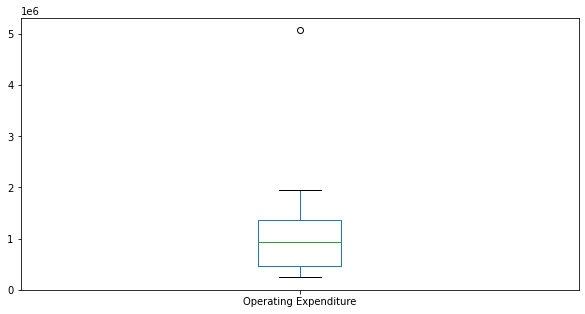

In [150]:
#checking for outliers
campaign_data['Operating Expenditure'][:20].plot(kind ='box', figsize=(10,5))

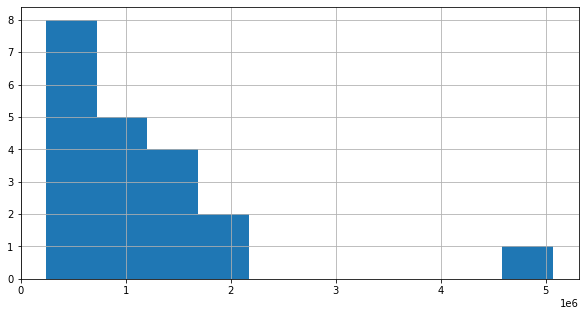

In [39]:
campaign_data['Operating Expenditure'][:20].hist(figsize = (10,5))

In [58]:
#campaign_data['Operating Expenditure'][:20].plot(kind="pie", y='amount',figsize = (10,10))
#plt.axis('equal')

In [36]:
campaign_data['Operating Expenditure'].sort_values(ascending = False)[:20]

1197    2.383749e+08
1278    2.266856e+08
1319    8.721609e+07
1206    6.159897e+07
1405    4.633737e+07
1307    3.480796e+07
1120    2.424846e+07
1113    1.971082e+07
1355    1.884238e+07
481     1.858756e+07
1125    1.476806e+07
377     1.363574e+07
1422    1.338284e+07
581     1.335449e+07
1196    1.319144e+07
1098    1.269870e+07
563     1.265381e+07
376     1.241924e+07
1194    1.217292e+07
1209    1.189962e+07
Name: Operating Expenditure, dtype: float64

In [78]:
#top 20 candidates above Operating Expenditure's mean  
upperCut = campaign_data[campaign_data['Operating Expenditure'] >1.250838e+06]
upperCut= upperCut.sort_values(['winner'],axis=0, ascending=False)[:20]
upperCut.head()

#elaborate more on 'candidate office state', 'candidate office district', 'candidate zip'
#why repeating the 'candidate office state' when there's candidate state?

,Candidate Id,Candidate Name,Candidate Office,Candidate Office State,Candidate Office District,Candidate Party Affiliation,Candidate Incumbent Challenger Open Seat,Candidate City,Candidate State,Candidate Zip,Coverage Start Date,Coverage End Date,Individual Contribution,Net Operating Expenditure,Total Contribution,Total Disbursement,Net Contribution,Operating Expenditure,Total Receipts,winner
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,1.0
330,H0CA48024,"ISSA, DARRELL",H,CA,49.0,REP,INCUMBENT,VISTA,CA,92085.0,1/1/2015,10/19/2016,1002078.12,3863727.20,1736307.97,3941471.54,1729662.97,3867626.54,1973187.02,1.0
334,H2AZ09019,"SINEMA, KYRSTEN",H,AZ,9.0,DEM,INCUMBENT,TEMPE,AZ,85285.0,1/1/2015,10/19/2016,2087867.66,2129141.03,3855516.65,2336639.98,3817156.62,2298279.95,4135490.59,1.0
340,H0CA03078,"BERA, AMERISH",H,CA,7.0,DEM,INCUMBENT,ELK GROVE,CA,95758.0,1/1/2015,10/19/2016,2392006.45,3060584.69,3661038.65,3387820.43,3611611.26,3062067.04,3665912.70,1.0
341,H2NV00050,"KIHUEN, RUBEN",H,NV,4.0,DEM,CHALLENGER,LAS VEGAS,NV,89102.0,1/1/2015,10/19/2016,1389006.09,1807548.55,1866351.70,1846747.07,1841699.38,1820844.75,1890902.20,1.0


In [116]:
#upperCut['Candidate Office State'] == upperCut['Candidate State']

In [115]:
upperCut['Candidate Office'].unique()

array(['H', 'S'], dtype=object)

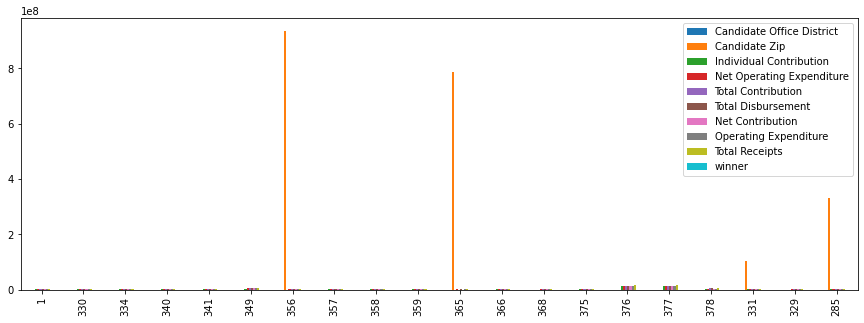

In [77]:
upperCut.plot(kind="bar", figsize = (15,5))

In [119]:
#upperCut['Candidate Party Affiliation'].unique()
campaign_data['Candidate Party Affiliation'].unique()

array(['REP', 'DEM', 'UNK', 'DFL', 'NPA', 'LIB', 'IND', 'UN', 'GRE',
       'OTH', 'NON', 'NNE', 'CON', 'W', 'ID', 'NPP', 'PPT', 'IDP'],
      dtype=object)

In [57]:
#campaign_data['winner'][:100].plot(kind="pie", y='amount',figsize = (10,10))
#plt.axis('equal')

In [56]:
import plotly.express as px

In [60]:
districtCompetitors = campaign_data.groupby(by = ['Candidate Office State','Candidate Office District'])['Candidate Id'].count()
districtCompetitors

Candidate Office State  Candidate Office District
AK                      0.0                           6
AL                      0.0                           5
                        1.0                           1
                        2.0                           2
                        3.0                           3
                                                     ..
WI                      8.0                           4
WV                      1.0                           2
                        2.0                           5
                        3.0                           3
WY                      0.0                          10
Name: Candidate Id, Length: 470, dtype: int64

In [74]:
#Visualize with plotly choropleth map
#districtCompetitors.sort_values(ascending=True).plot(kind="bar", figsize = (15,5))

In [61]:
expenditurePerDistrict = campaign_data.groupby(['Candidate Office State','Candidate Office District'])['Operating Expenditure'].sum()
expenditurePerDistrict

Candidate Office State  Candidate Office District
AK                      0.0                           1886452.04
AL                      0.0                          12240639.61
                        1.0                            941648.85
                        2.0                           1509824.25
                        3.0                            881187.16
                                                        ...     
WI                      8.0                           3493378.83
WV                      1.0                            646609.09
                        2.0                           1553486.36
                        3.0                            434725.78
WY                      0.0                           2354727.07
Name: Operating Expenditure, Length: 470, dtype: float64

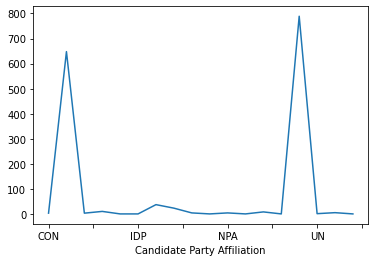

In [127]:
campaign_data.groupby(by=['Candidate Party Affiliation'])['Candidate Office'].count().plot()

In [129]:
districtGrp = campaign_data.set_index(['Candidate Office State','Candidate Office District']).sort_values(by=['Candidate Office State','Candidate Office District'])
districtGrp

Candidate Id  \
Candidate Office State Candidate Office District                
AK                     0.0                          H6AK00045   
                       0.0                          S6AK00201   
                       0.0                          S0AK00121   
                       0.0                          S6AK00151   
                       0.0                          S6AK00144   
...                                                       ...   
WY                     0.0                          H6WY01082   
                       0.0                          H6WY01058   
                       0.0                          H6WY00142   
                       0.0                          H6WY01090   
                       0.0                          H6WY01041   

                                                            Candidate Name  \
Candidate Office State Candidate Office District                             
AK                     0.0                                 YOUNG, DONALD E   
                       0.0                          CRAIG, BRECK ANDREW MR   
                       0.0                                MILLER, JOSEPH W   
                       0.0                                 STOCK, MARGARET   
                       0.0                                    LOCHNER, BOB   
...                                                                    ...   
WY                     0.0                               SMITH, DARIN DALE   
                       0.0                        STUBSON, TIMOTHY MICHAEL   
                       0.0                           CHRISTENSEN, LELAND G   
                       0.0                                    RAMMELL, REX   
                       0.0                              TYRREL, CHARLES T.   

                                                 Candidate Office  \
Candidate Office State Candidate Office District                    
AK                     0.0                                      H   
                       0.0                                      S   
                       0.0                                      S   
                       0.0                                      S   
                       0.0                                      S   
...                                                           ...   
WY                     0.0                                      H   
                       0.0                                      H   
                       0.0                                      H   
                       0.0                                      H   
                       0.0                                      H   

                                                 Candidate Party Affiliation  \
Candidate Office State Candidate Office District                               
AK                     0.0                                               REP   
                       0.0                                               UNK   
                       0.0                                               LIB   
                       0.0                                               IND   
                       0.0                                               REP   
...                                                                      ...   
WY                     0.0                                               REP   
                       0.0                                               REP   
                       0.0                                               REP   
                       0.0                                               REP   
                       0.0                                               REP   

                                                 Candidate Incumbent Challenger Open Seat  \
Candidate Office State Candidate Office District                                            
AK                     0.0                                     

In [76]:
#Try plotly scatter plot
#expenditurePerDistrict.sort_values(ascending=True).plot(kind="bar", figsize = (15,5))

In [108]:
fig = px.scatter(campaign_data, x= campaign_data['Candidate Party Affiliation'], y= campaign_data['Operating Expenditure'], hover_name= 'winner',text = 'Candidate Name',  title ='Expenditure per Affiliation Party')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [109]:
#Not really needed
fig = px.scatter(campaign_data, x= campaign_data['Candidate Office District'], y= campaign_data['Operating Expenditure'], hover_name= 'winner',text = 'Candidate Name',  title ='Expenditure vs District')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [120]:
#Try visualizing expenditure vs votes use 'winner' column as colour-classification
#visualize number of campaigns vs expenditure
#Visualaize number of campaigns vs total contributions
#comapre total disbursement and (net)operating expenditure
#compare net contribution and total receipts
fig = px.scatter(campaign_data, x= campaign_data['Candidate Party Affiliation'], y= campaign_data['Operating Expenditure'],color = 'winner',  title ='Expenditure vs party')
fig.show()

Candidate Incumbent Challenger Open Seat
CHALLENGER    735
INCUMBENT     419
OPEN          397
Name: Candidate Incumbent Challenger Open Seat, dtype: int64


(-1.1102486989356926,
 1.100488033282652,
 -1.1054126372217155,
 1.118277604308006)

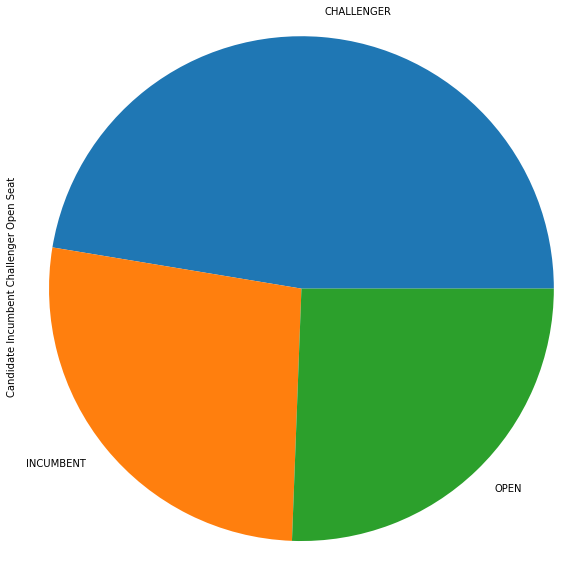

In [98]:
a = campaign_data.groupby(by = ['Candidate Incumbent Challenger Open Seat'])['Candidate Incumbent Challenger Open Seat'].count()
print(a)
campaign_data.groupby(by = ['Candidate Incumbent Challenger Open Seat'])['Candidate Incumbent Challenger Open Seat'].count().plot(kind="pie", y='amount',figsize = (10,10))
plt.axis('equal')
#fig = px.pie(campaign_data, values=['Candidate Incumbent Challenger Open Seat'].count(), names='Candidate Party Affiliation')
#fig.show()

In [145]:
#rawCampaignData = pd.read_csv('C:\\Users\\Samuel.Adeapin\\jupyter_docs\\GitHub\\12-campaign-finance\\data\\CandidateSummaryAction1.csv')
#rawCampaignData

In [146]:
#rawCampaignData.votes.count()